In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import math
import matplotlib.image as mpimg
from scipy import interpolate
import matplotlib.dates as mdates

# Making Data base of received stations and variables

In [13]:
## pd.readexcelt('Coordinate.xls')
#Directory with Station Data from IDEAM (Meteorological Institution in Colombia)
PATH='/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/DATA/DATAfromIdeam/RADICADO_20229050002332'
Path_Stat='/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/DATA/DataProcessing/STATIONS_IDEAM.xls'
Data_Path='/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/DATA/DATAfromIdeam/Variables_code'
INFO=os.listdir(PATH)
A=[i.replace('.data','') for i in INFO]
# As each of the file name contains the station and the variable code, those parameters are taken 
DATA=[i.split('@') for i in A]
#Data Frame with the station and the variable code
DATA=pd.DataFrame(DATA)
#Creation of list of names for each  code name
DATA.columns=['VarId','Station']
VV=pd.read_csv(Data_Path,delimiter=':',names=['Code','Name'])#Variable code and name 
V=list(VV['Name'])
DATA['FileName']=INFO
DATA['Station']=DATA['Station'].astype(dtype=int,errors='ignore')
#list of needed variables codes, Selecting temperature, relative humidity, wind direction, wind speed
A=list(VV.iloc[[1,2,3,7,11,12,10,27,19]].Code)
#Received Stations
R_Stations=DATA.Station[DATA['VarId'].isin(A)].drop_duplicates()
#IDEAM Stations Database
Stations=pd.read_excel(Path_Stat)
#Coordinates received stations
Coord=Stations[['Station','nombre','altitud','latitud','longitud']][Stations['Station'].isin(list(R_Stations.astype(int)))]
Coord.to_csv('AvailableStations.csv')
Coord['Station']=Coord['Station'].astype(dtype=str)
#list of files with needed variables
Coord
A

['TSSM_CON',
 'VVAG_CON',
 'PTPM_CON_INTER ',
 'DVMX_AUT_60',
 'HRA2_AUT_60',
 'HRA10_MN_D',
 'DVMX_MX_D',
 'VV_AUT_10',
 'TA2_AUT_60']

In [14]:
Lee=Coord[(Coord['latitud']<3.5)&(Coord['latitud']>3)&(Coord['longitud']>-75)&(Coord['longitud']<-73)&(Coord['altitud']<7000)&(Coord['altitud']>0)]
In=DATA[DATA['VarId'].isin(A)]
Variable='DVMX_AUT_60'# 
# Variable='TA2_AUT_60'
WS=Coord[Coord['Station'].isin(In[In['VarId']==Variable]['Station'])]
Lee=WS[(WS['latitud']<5)&(WS['latitud']>4)&(WS['longitud']>-75)&(WS['longitud']<-74)&(WS['altitud']<4000)&(WS['altitud']>0)]
# Lee.sort_values(by='latitud',ascending=False)


In [15]:
Inn=In[In['Station'].isin(list(Lee.Station))]['FileName']
In[In['Station']==21206550]
Lee.sort_values(by='latitud')
# Lee=Lee[Lee['Station']=='35035090']
In[In['VarId']=='TA2_AUT_60']
Lee

,Station,nombre,altitud,latitud,longitud
75,21185090,NATAIMA - AUT [21185090],393,4.188139,-74.960472
88,21195190,PASCA - AUT [21195190],2256,4.310111,-74.311750
89,21206920,VILLA TERESA - AUT [21206920],3624,4.350000,-74.150000
92,21195160,SUBIA - AUT [21195160],275,4.476611,-74.383889
96,21235030,UNIVERSIDAD DE CUNDINAMARCA - AUT [21235030],309,4.305333,-74.808111
102,21255160,HACIENDA PAJONALES [21255160],277,4.760722,-74.834250
105,21206990,TIBAITATA - AUT [21206990],2543,4.691417,-74.209000
111,21206940,CIUDAD BOLIVAR [21206940],2687,4.576861,-74.176778
122,21206960,IDEAM BOGOTA - AUT [21206960],2646,4.600000,-74.066667
123,21205012,UNIVERSIDAD NACIONAL - AUT [21205012],2556,4.638083,-74.089083


#  Available Stations Map and Lee Stations Map

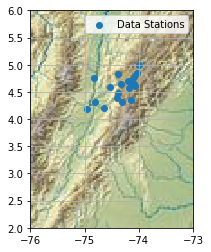

In [16]:
LON_all=list(Coord['longitud'])
LAT_all=list(Coord['latitud'])
LON_lee=list(Lee['longitud'])
LAT_lee=list(Lee['latitud'])
NAME=Lee['altitud']
def Plot(LOND,LATD,minlat,maxlat,minlon,maxlon,NAME,sticks):
    fig,ax=plt.subplots()
    ax.imshow(mpimg.imread('/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/DATA/WRFValidation/Colombia_relief_location_map.jpg'),extent=(-85.12,-66.44,-4.6,16.6))
    #ax.imshow(mpimg.imread('/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/Tesis/DATA/ERA5vsDATA/Colombia_Topography_2.png'),extent=(-80,-68,2,14))
    plt.ylim([minlat,maxlat])
    plt.xlim([minlon,maxlon])
    plt.grid()
    ax.scatter(LOND,LATD,label='Data Stations')
    ax=fig.gca()
    #LONN=[str(-x)+' W' for x in LOND]
    #ax.set_xticklabels(LONN)
    if sticks==1:
        ax.set_xticklabels(LOND)
        for i, txt in enumerate(NAME):
            ax.annotate(str(txt), (LOND[i], LATD[i]),color='black',weight='bold',fontsize=12)
    plt.legend()
    plt.savefig('MapEstations.png')
    plt.show()
#Plot(LON_all,LAT_all,0,10,-78,-70,NAME,0)
#Plot(LON_all,LAT_all,0,10,-75,-70,NAME,0)
Plot(LON_lee,LAT_lee,2,6,-76,-73,NAME,0)

